# Keras, overfitting, regularlization

- Part 3.1: Basic Keras
- Part 3.2: Regularization and overfitting

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import setuptools.dist
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Exercises

### Part 3.1: Basic Keras

> **Ex. 3.1.1** Let's get started with Keras by examining the implementation of an actual neural network.
I have implemented a very simple `sequential` model to classify handwritten digits from the [mnist](https://keras.io/datasets/#mnist-database-of-handwritten-digits) data set.  Follow the code closely.  Make sure you understand it.  Use Keras documentation e.g. [First contact with Keras](https://keras.io/about/), [Dense Layer](https://keras.io/api/layers/core_layers/dense/), [Getting started with the Keras Sequential model](https://keras.io/getting-started/sequential-model-guide/).

In [2]:
#download the dataset
(x, y), _ = tensorflow.keras.datasets.mnist.load_data()

# Reshape each image to 1dim vector. Effectively, reshape
# `x_train` from (60000, 28, 28) to (60000, 28*28)
x_train = x[:50000].reshape(-1, 28*28)
x_test = x[50000:].reshape(-1, 28*28)

# Convert y_train from vector of labels to one-hot encoding vector
y = tensorflow.keras.utils.to_categorical(y, num_classes=10)
y_train = y[:50000]
y_test = y[50000:]

>In the following code cell, I construct the model.  Answer the following questions:
>1. How many layers does the network have?
>2. How many neurons in each layer ?
>3. Why is the input dimension 784?
>4. How many weights are there between each layer? (_Hint_: verify with ``model.summary()`` below). Explain how to get these numbers.

### ANSWERS
1.  There was originally only middle one layer with 20 neurons. Other than that, there is an input layer, and an output layer


2. This network 784 inputs, and 10 outputs corresponding to each of the classes.


3. This is because the size of the image is 28 by 28, and $28^2 = 784$. 


4. Let's break this down by layer. We know that we need one parameter running between each neuron in the first layer and each in 
    the  second, and therefore it is sufficient to multiply the size of both, and then add the number of neurons in the second (for the bias terms) to determine the number of parameters that we have in the dataset.
    In between the input layer and the one middle layer that is currently defined in the network, there are $20 \times 784$ parameters, or $15680$ parameters. We add $20$ (the number of biases in the middle layer) to get $15700$
    In between the middle layer and the output, we are going to have $20 \times 10$ or $200$ parameters. We are also going to have the $10$ biases for the outputs, which gives us $210$ in total.

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation

#
model = Sequential()
model.add(Dense(32, input_dim=784, activation = 'relu'))
model.add(Dense(24, input_dim=32, activation = 'relu'))
# model.add(Dense(16, input_dim=24, activation = 'tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/Users/leogordon/Desktop/DIS/ANN Env/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# let's see what the model "looks" like
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,162 (102.20 KB)

 Trainable params: 26,162 (102.20 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# fit the model to the training data
H = model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4459 - loss: 9.2229
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7586 - loss: 0.9210  
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8250 - loss: 0.6226
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8772 - loss: 0.4737  
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8935 - loss: 0.4056


In [6]:
# evaluate the model on the test dataset
score = model.evaluate(x_test, y_test, batch_size=100)
print(score[0])
print(score[1])

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8955 - loss: 0.4321  
0.38321375846862793
0.9077000021934509


>What kind of scores did you obtain?  What do score[0] and score[1] represent?  

>How could the accuracy be improved?
>1. First try to improve the performance by retraining the model for a longer time (i.e., higher number of epochs).  How much does the accuracy improve?
2. Then try to change the architecture of the network.  For example add more neurons to the exisiting layers; also add another layer of neurons.  Refit the data.  Does the performance increase?
3. **BONUS**. Can you score over 90% accuracy in just five training epochs? (Wait with this exercise, come back to this question when you're done with all the exercises)

### ANSWERS

1. `score[0]` is the evaluation loss, and `score[1]` is the accuracy of the network.

2.  We can increase the accuracy by adding more neurons. By changing the optimizer to `'adam'` and the loss function to `'categorical_crossentropy'` we can also get a very large increase in accuracy

3. yes. see the above architecture for details

> **Ex. 3.1.2** Solve exercises 1.2.2 and 1.2.3 from week 1 (producing the same result plots), but solve them using Keras.
> Comment on differences in speed and outcome if you observe any.

### Ex 3.1.2 code and ANSWERS

In [7]:
def generate_X_linear(N=200):
    X = np.vstack([
        np.random.normal([-2, -2], 1, size=(int(N/2), 2)),
        np.random.normal([2, 2], 1, size=(int(N/2), 2))
    ])

    y = np.array([0] * int(N/2) + [1] * int(N/2)).reshape(-1, 1)
    
    return X, y

def generate_X_nonlinear(N=200, R=5):
    X_inner = np.random.normal([0, 0], 1, size=(int(N/2), 2))

    X_outer = np.array([
        [R*np.cos(theta), R*np.sin(theta)]
        for theta in np.linspace(0, 2 * np.pi, int(N/2))
    ]) + np.random.randn(int(N/2), 2)

    X = np.vstack([X_inner, X_outer])
    y = np.array([0] * int(N/2) + [1] * int(N/2)).reshape(-1, 1)
    
    return X, y

#### build the dataset and test_set

In [8]:
X_train, y_train = generate_X_linear(N=20000)
X_train.shape

# convert y_train to the right thing
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=2)

X_test, y_test = generate_X_linear(N=2000)
X_train.shape

# convert y_train to the right thing
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=2)

#### define the model

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation

#
model = Sequential()
model.add(Dense(2, input_dim=2, activation = 'relu'))
model.add(Dense(24, input_dim=32, activation = 'relu'))
# model.add(Dense(16, input_dim=24, activation = 'tanh'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# let's see what the model "looks" like
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 24)             │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128 (512.00 B)

 Trainable params: 128 (512.00 B)

 Non-trainable params: 0 (0.00 B)

#### fit

In [10]:
H = model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step - accuracy: 0.5491 - loss: 0.6772
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.8563 - loss: 0.3765
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.9383 - loss: 0.1591
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.9685 - loss: 0.0881
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.9773 - loss: 0.0646


#### test

In [11]:
score = model.evaluate(X_test, y_test, batch_size=100)
print(score[0])
print(score[1])

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9807 - loss: 0.0512 
0.05711754411458969
0.9779999852180481


### Second part of 3.1.2

In [12]:
X_train, y_train = generate_X_nonlinear(N=20000)
X_train.shape

# convert y_train to the right thing
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=2)

X_test, y_test = generate_X_nonlinear(N=2000)
X_train.shape

# convert y_train to the right thing
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=2)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation

#
model = Sequential()
model.add(Dense(3, input_dim=2, activation = 'relu'))
model.add(Dense(3, input_dim=32, activation = 'relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# let's see what the model "looks" like
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29 (116.00 B)

 Trainable params: 29 (116.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
H = model.fit(X_train, y_train, epochs=25, batch_size=128)

Epoch 1/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 821us/step - accuracy: 0.4756 - loss: 0.7302
Epoch 2/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.5818 - loss: 0.6448
Epoch 3/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.6893 - loss: 0.5754
Epoch 4/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.7633 - loss: 0.5117
Epoch 5/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.8109 - loss: 0.4542
Epoch 6/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.8362 - loss: 0.4127
Epoch 7/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.8465 - loss: 0.3913
Epoch 8/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.8542 - loss: 0.3693
Epoch 9/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.8682 - loss: 0.3486
Epoch 10/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.8821 - loss: 0.3185
Epoch 11/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.9204 - loss: 0.2577
Epoch 12/25
157/157 ━━━━━━━━━━

In [15]:
score = model.evaluate(X_test, y_test, batch_size=100)
print(score[0])
print(score[1])

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9785 - loss: 0.0840 
0.07319797575473785
0.9794999957084656



### Part 3.2: Overfitting and regularization

A model *overfitting* means that it treats what is essentially noise in the data, as important predictive features, or that it memorizes the outcomes for each training data point rather than general patterns.
Thus an overfitted model will score extremely well on the training data but poorly on new (unseen) data. 
In general, the more flexible a model is the easier it will overfit, and for this reason neural networks are notorious overfitters.
Broadly speaking, the way to combat this is to *regularize* the network.

> **Ex. 3.2.1** To understand overfitting, we will intentionally overfit some data! Let's fit a neural network to the following data.  

Text(0.5, 1.0, 'Test data')

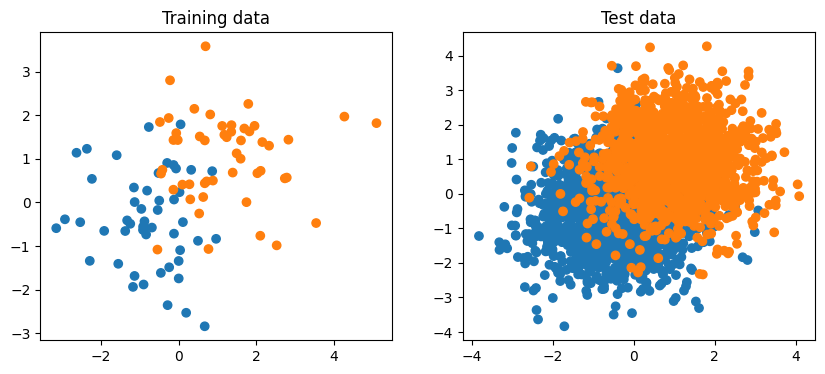

In [16]:
#code given in week1 exercise 1.2.2, slightly modified to have some crossover points

np.random.seed(2)
def generate_X_linear(N=200):
    X = np.vstack([
        np.random.normal([-0.5, -0.5], 1, size=(int(N/2), 2)),
        np.random.normal([1, 1], 1, size=(int(N/2), 2))
    ])

    y = np.array([0] * int(N/2) + [1] * int(N/2)).reshape(-1, 1)
    
    return X, y

ntr=100
nts=3e3
x_train, y_train = generate_X_linear(N=ntr)
x_test, y_test = generate_X_linear(N=nts)

fig,ax = plt.subplots(1,2, figsize=[10,4])
ax[0].scatter(x_train[:,0],x_train[:,1],color=['C'+str(i) for i in y_train.ravel()])
ax[1].scatter(x_test[:,0],x_test[:,1],color=['C'+str(i) for i in y_test.ravel()])
ax[0].set_title('Training data'); ax[1].set_title('Test data')

> The *theoretical optimal decision boundary* to separate two gaussian point clouds (no matter how close the centers are) is a *straight line*, and since the clusters are overlapping it is natural that there will be some error when fitting the model to the data. Nevertheless, try to reduce the error to 0 (accuracy = 1) by adding layers of ``overfitter.add(Dense(200, activation = 'relu'))`` to the code below

In [26]:
import keras
from keras.callbacks import EarlyStopping
keras.utils.set_random_seed(1337)
overfitter = Sequential()
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(1, activation='sigmoid'))
overfitter.compile(optimizer='adam',
              loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])

history = overfitter.fit(x_train, y_train, epochs=200, batch_size=128, validation_data = (x_test, y_test))

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5806 - loss: 0.6670 - val_accuracy: 0.8440 - val_loss: 0.5081
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8355 - loss: 0.4496 - val_accuracy: 0.8467 - val_loss: 0.3508
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8468 - loss: 0.3382 - val_accuracy: 0.8483 - val_loss: 0.3514
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8472 - loss: 0.3340 - val_accuracy: 0.8463 - val_loss: 0.3361
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8535 - loss: 0.3228 - val_accuracy: 0.8430 - val_loss: 0.3403
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8558 - loss: 0.3163 - val_accuracy: 0.8437 - val_loss: 0.3411
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8631 - loss: 0.3140 - val_accuracy: 0.8430 - val_loss: 0.3367
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8615 - loss: 0.3112 - val_accuracy: 0.8423 - val_loss:

> When you get acc=1, plot the test data and colour it using the predictions of your neural network

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


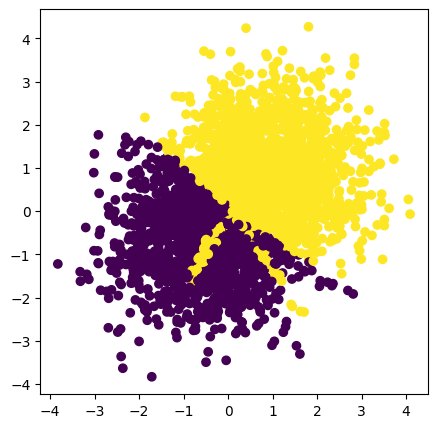

In [18]:
pred_class = overfitter.predict(x_test) > 0.5 # what does this line do?
fig,ax = plt.subplots(1, 1, figsize=[5,5])
ax.scatter(x_test[:,0], x_test[:,1], c=pred_class)

> Now plot the training and test loss as a function of number of epochs

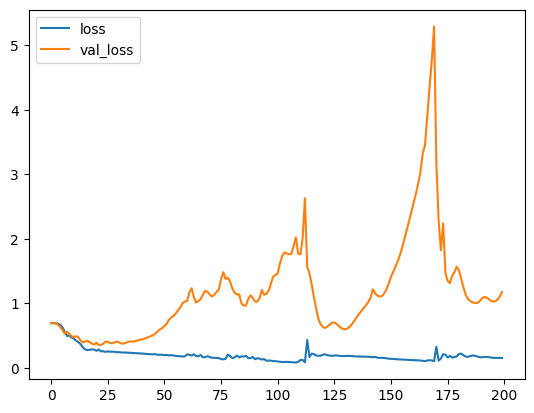

In [19]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

> Finally, use different types of regularization to avoid overfitting:
> - For each technique, provide a working code sample (Remember, all results shall be available when running the notebook as a whole. Make sure this is possible.),
> - For each technique, plot the training and test loss as a function of number of epochs as you did above.
>
> **Ex 3.2.2** Norm regularization:
> 1. Apply L2 regularization to your network so that it cannot overfit. Read about regularization in Keras here: [Layer Weight Regularizers](https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/). When you add a new layer to your model, one of the parameters is `kernel_regularizer` -- this allows you to select a regularization technique (`l2` in our case), together with a hyperparameter for the regularization.
> 2. What does L2 regularization do? Compare the absolute size of weights in the unregularized and regularized model.
>
> *Hint:* `model.weights` will give you a list of weights and bias arrays for each layer. They are in a Tensorflow format but you can call `.numpy()` on them to get them out as numpy arrays.

In [20]:
import keras
from keras.regularizers import l2
overfitter = Sequential()
overfitter.add(Dense(200,kernel_regularizer=l2(0.01), activation = 'relu'))
overfitter.add(Dense(200,kernel_regularizer=l2(0.01), activation = 'relu'))
overfitter.add(Dense(200,kernel_regularizer=l2(0.01), activation = 'relu'))
overfitter.add(Dense(200,kernel_regularizer=l2(0.01), activation = 'relu'))
overfitter.add(Dense(200,kernel_regularizer=l2(0.01), activation = 'relu'))
overfitter.add(Dense(200,kernel_regularizer=l2(0.01), activation = 'relu'))
overfitter.add(Dense(200,kernel_regularizer=l2(0.01), activation = 'relu'))
overfitter.add(Dense(200,kernel_regularizer=l2(0.01), activation = 'relu'))
overfitter.add(Dense(200,kernel_regularizer=l2(0.01), activation = 'relu'))
overfitter.add(Dense(200,kernel_regularizer=l2(0.01), activation = 'relu'))
overfitter.add(Dense(200,kernel_regularizer=l2(0.01), activation = 'relu'))
overfitter.add(Dense(200,kernel_regularizer=l2(0.01), activation = 'relu'))
overfitter.add(Dense(200,kernel_regularizer=l2(0.01), activation = 'relu'))
overfitter.add(Dense(200,kernel_regularizer=l2(0.01), activation = 'relu'))
overfitter.add(Dense(200,kernel_regularizer=l2(0.01), activation = 'relu'))
overfitter.add(Dense(200,kernel_regularizer=l2(0.01), activation = 'relu'))
overfitter.add(Dense(1, activation='sigmoid'))
overfitter.compile(optimizer='adam',
              loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])
keras.utils.set_random_seed(1337)
history = overfitter.fit(x_train, y_train, epochs=12, batch_size=128, validation_data = (x_test, y_test))

Epoch 1/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5000 - loss: 30.7263 - val_accuracy: 0.6233 - val_loss: 29.9989
Epoch 2/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.6500 - loss: 29.9988 - val_accuracy: 0.8557 - val_loss: 29.2827
Epoch 3/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.8700 - loss: 29.2826 - val_accuracy: 0.8360 - val_loss: 28.5786
Epoch 4/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.8800 - loss: 28.5783 - val_accuracy: 0.8040 - val_loss: 27.8867
Epoch 5/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.7900 - loss: 27.8864 - val_accuracy: 0.8120 - val_loss: 27.2071
Epoch 6/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.8400 - loss: 27.2067 - val_accuracy: 0.8510 - val_loss: 26.5399
Epoch 7/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.9000 - loss: 26.5395 - val_accuracy: 0.8560 - val_loss: 25.8853
Epoch 8/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.8800 - loss: 25.8848 - val_accuracy: 0.8553

> **Ex 3.2.3** Early stopping: Often we like to monitor the model's performance on a test set also while we train the model.
This allows us to do something called "early stopping" which is a way of regularizing by stopping the training process before the network overfits (we know it overfits when the performance on the training set starts getting much better than on the test set).
Implement early stopping when training on the random data above. What accuracy do you get?
>
> *Hint*: There's an example [here](https://keras.io/getting-started/faq/#how-can-i-interrupt-training-when-the-validation-loss-isnt-decreasing-anymore) and a more complete explanation [here](https://keras.io/api/callbacks/early_stopping/).

In [21]:
import keras
from keras.callbacks import EarlyStopping
overfitter = Sequential()
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(1, activation='sigmoid'))
overfitter.compile(optimizer='adam',
              loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])
keras.utils.set_random_seed(1337)
# Define Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss for early stopping
    patience=10,         # Number of epochs to wait before stopping
    restore_best_weights=True, # Restore the weights of the best epoch
    verbose=1           # Print messages when early stopping occurs
)

# Fit the model with Early Stopping
history = overfitter.fit(
    x_train, y_train, 
    epochs=200, 
    batch_size=128, 
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]  # Add the EarlyStopping callback
)
# history = overfitter.fit(x_train, y_train, epochs=200, batch_size=128, validation_data = (x_test, y_test))

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.6930 - val_accuracy: 0.7743 - val_loss: 0.6920
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.8000 - loss: 0.6916 - val_accuracy: 0.8143 - val_loss: 0.6862
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.8700 - loss: 0.6847 - val_accuracy: 0.8153 - val_loss: 0.6713
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.8800 - loss: 0.6666 - val_accuracy: 0.8103 - val_loss: 0.6404
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.8700 - loss: 0.6284 - val_accuracy: 0.8050 - val_loss: 0.5867
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.8600 - loss: 0.5617 - val_accuracy: 0.8057 - val_loss: 0.5320
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.8600 - loss: 0.4874 - val_accuracy: 0.8227 - val_loss: 0.5529
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.8800 - loss: 0.4759 - val_accuracy: 0.8477 - val_

> **Ex 3.2.4** Dropout: Another clever way to regularize a network, is to randomly "drop out" some fraction of neurons during each training batch, so the network cannot store memory in specific neurons. The method is called Dropout. Go ahead and take your overfitting model and apply dropout in one or more of the layers and comment on the performance.
>
> *Hint*: Check out the reference [here](https://keras.io/api/layers/regularization_layers/dropout/).

In [22]:
import keras
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
overfitter = Sequential()
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dropout(0.2))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dropout(0.2))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dropout(0.2))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dropout(0.2))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dropout(0.2))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dropout(0.2))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dropout(0.2))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dropout(0.2))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dropout(0.2))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dropout(0.2))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dropout(0.2))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dropout(0.2))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dropout(0.2))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dropout(0.2))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dropout(0.2))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dropout(0.2))
overfitter.add(Dense(1, activation='sigmoid'))
overfitter.compile(optimizer='adam',
              loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])
keras.utils.set_random_seed(1337)
history = overfitter.fit(x_train, y_train, epochs=200, batch_size=128, validation_data = (x_test, y_test))

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5800 - loss: 0.6926 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.4500 - loss: 0.6927 - val_accuracy: 0.7483 - val_loss: 0.6919
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.5000 - loss: 0.6908 - val_accuracy: 0.5310 - val_loss: 0.6885
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.5400 - loss: 0.6845 - val_accuracy: 0.5000 - val_loss: 0.6774
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.5000 - loss: 0.6678 - val_accuracy: 0.5000 - val_loss: 0.6490
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.5000 - loss: 0.6369 - val_accuracy: 0.5000 - val_loss: 0.5925
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.5000 - loss: 0.5603 - val_accuracy: 0.6543 - val_loss: 0.5357
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.5000 - loss: 0.5371 - val_accuracy: 0.7913 - val_

> **Ex 3.2.5** More data: The most important thing when training a machine learning model is getting enough data. Oftentimes, having enough data is all the regularization you need: The training phase is updating the weights to makes the cost function smaller, but the cost function now tries to make the network good at predicting on many different data-points. This leads to the network having to come up with more generalizable prediction rules (and generalization is opposite of overfitting).
>
> Change `ntr` from `100` to `1000` in the code that generates the data and run the `overfitter` model that you got to overfit on the smaller dataset of 100 datapoints; what happens?

In [24]:
ntr=1000
nts=3e3
x_train, y_train = generate_X_linear(N=ntr)
x_test, y_test = generate_X_linear(N=nts)

overfitter_l2 = Sequential()
overfitter_l2.add(Dense(200, input_dim=2, activation = 'relu'))
overfitter_l2.add(Dense(200, activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.01)))
overfitter_l2.add(Dense(200, activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.01)))
overfitter_l2.add(Dense(200, activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.01)))
overfitter_l2.add(Dense(1, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(0.01)))

overfitter_l2.compile(optimizer='adam',
              loss='crossentropy',
              metrics=['accuracy'])

# fit the model to the training data
history = overfitter_l2.fit(x_train, y_train, epochs=300, batch_size=128, validation_data = (x_test, y_test))

# evaluate the model on the test dataset
score = overfitter_l2.evaluate(x_test, y_test, batch_size=100)

Epoch 1/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5191 - loss: 29.5018

KeyboardInterrupt: 

> **Ex 3.2.6** Comparison: Compare the different types of regularization and express your ideas on how you would use them for a project.

### **Ex 3.2.6 - Comparison of Regularization Techniques**  

After looking at different regularization techniques, we all agreed that each method has its strengths depending on the type of problem we're dealing with.  

**L1 regularization** seems like a good choice when we want the model to focus on only the most important features, since it pushes some weights to zero. But the downside is that it might remove useful features entirely, so we’d have to be careful with that.  

On the other hand, **L2 regularization** doesn’t force weights to zero but instead keeps them small, which helps prevent any single feature from dominating. This seems like the safer option if we know all features are useful but still want to control overfitting.  

We also talked about **dropout**, which randomly turns off neurons during training. This forces the model to learn more robust features instead of relying too much on specific neurons. It’s great for deep networks, but if the dropout rate is too high, the model might struggle to learn anything meaningful. We’d probably use dropout mostly in fully connected layers rather than convolutional layers.  

Then there’s **batch normalization**, which helps stabilize training by normalizing activations across layers. This speeds up training and can help deep networks generalize better, so we’d definitely use it in complex models. But since it adds extra computation, we might avoid it if training speed isn’t an issue.  

Finally, we looked at **early stopping**, which is a pretty simple but effective technique. Instead of adding more layers or changing weight behavior, it just stops training when the validation loss stops improving. It’s probably the easiest regularization method to use, but we’d need to tune it properly—otherwise, it might stop too soon before the model reaches its best performance.  

For a project, our choice would depend on the dataset and model type. If the dataset is small, we’d go with **L2 regularization** and **dropout** to avoid overfitting. For deep networks, **batch normalization** would be useful, and we’d probably add **dropout** in fully connected layers. If training takes too long, we’d definitely use **early stopping** to save time.  

If we were training a CNN for image classification, we’d include **dropout (around 0.5 in dense layers)** and **batch normalization** to stabilize training. For an NLP model using LSTMs, we’d go with **dropout between layers** but skip batch normalization since it doesn’t really work well with sequential data.  

In the end, there’s no perfect regularization method that works for everything. The best approach would be to combine multiple techniques and experiment to see what gives the best results.  
